# Investigate a Dataset

## Introduction

Here on "Investigate a Dataset" project, I pick the dataset of [Titanic Data](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv), which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

## Question
While I skim through the description and simple dataset, I got some questions, such as "which group of people survived the most / the least? What was the average fare for the ticket for Titanic in each class? Which port did people mostly embarked?" In order to answer these questions, I will analyze the data using many built in function of Pandas, such as correlation, describe, counts, and others.

In [35]:
""" import necessary library """
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Next thing I will do is to import a CSV file from the project introduction page, which is a Titanic data set. I will test it as well to make sure there's no error when loading it. Conveniently, it also shows how many rows and columns there are.

In [2]:
""" import necessary file and test it """
df = pd.read_csv('../Nanodegree/titanic-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First thing to do before analyzing is to clean up the data types in the table.

In [3]:
""" cleaning up the data, to either integer or float """
df['PassengerId'] = pd.to_numeric(df['PassengerId'], downcast='integer')
df['Survived'] = pd.to_numeric(df['Survived'], downcast='integer')
df['Pclass'] = pd.to_numeric(df['Pclass'], downcast='integer')
df['Age'] = pd.to_numeric(df['Age'], downcast='float')
df['SibSp'] = pd.to_numeric(df['SibSp'], downcast='integer')
df['Parch'] = pd.to_numeric(df['Parch'], downcast='integer')
df['Fare'] = pd.to_numeric(df['Fare'], downcast='float')

Unless I want to get something mysterical correlation, the passengerId, name, number of siblings, number of parents or children, ticket number, and cabin seem not really relevent to the questions I have, so will remove them at this time.

In [4]:
""" remove unnecessary columns """
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.iloc[:10]

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.250000,S
1,1,1,female,38.0,71.283302,C
2,1,3,female,26.0,7.925000,S
3,1,1,female,35.0,53.099998,S
4,0,3,male,35.0,8.050000,S
5,0,3,male,NaN,8.458300,Q
6,0,1,male,54.0,51.862499,S
7,0,3,male,2.0,21.075001,S
8,1,3,female,27.0,11.133300,S
9,1,2,female,14.0,30.070801,C


Since there is no error doing it, I will jump to the next step and find if there's any missing data and count how many there are.

In [5]:
""" count how many nulls are there in each columns """
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

Some ages are missing, and two data on embarked are missing. As there is no missing data on the other column, it means those missing data still have other useful data on the other columns, so I will not filter them at this time, but when necessary, such as getting the statistics of ports embarked or calculating the age, I will remove null values.

Now ready to go to the exploration phase.

## Exploration

Easy thing first, let's see who are from which port and where most people are from.

[<matplotlib.text.Text at 0x97de390>, <matplotlib.text.Text at 0x94a6970>]

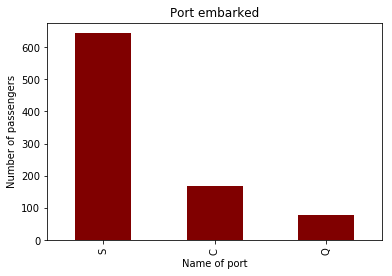

In [6]:
""" plot bar """
df['Embarked'].value_counts().plot(kind='bar', title='Port embarked', color='Maroon').set(xlabel="Name of port", ylabel="Number of passengers")

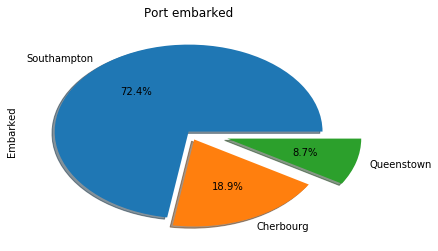

In [7]:
""" plot pie """
df['Embarked'].value_counts().plot(shadow=True, title='Port embarked', kind='pie', autopct = '%1.1f%%', labels=['Southampton', 'Cherbourg', 'Queenstown'], explode=[0, 0.1, 0.3])

From the bar graph above, it is clear that approximately 640, which is enough to be considered as most of people embarked at Southampton. Approximately 200 people embarked at Cherbourg, and other 100 people embarked at Queenstown.

Next one I want to do using data is, how the class of ticket (Pclass) and sex are correlative to the rate of survives. In order to calculate the correlation, the value of sex should be a number, so will convert it to 1: male and 0: female.

In [8]:
""" convert the value of sex from string to int (1: male, 0: female) and test it """
def convert_sex(sex):
    if sex == 'male':
        return 1
    elif sex == 'female':
        return 0
    else:
        return 'NaN'

df['Sex'] = df['Sex'].map(convert_sex)
df.iloc[:10]

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.250000,S
1,1,1,0,38.0,71.283302,C
2,1,3,0,26.0,7.925000,S
3,1,1,0,35.0,53.099998,S
4,0,3,1,35.0,8.050000,S
5,0,3,1,NaN,8.458300,Q
6,0,1,1,54.0,51.862499,S
7,0,3,1,2.0,21.075001,S
8,1,3,0,27.0,11.133300,S
9,1,2,0,14.0,30.070801,C


Unless I want to get something mysterical correlation, the passenger ID, name, number of siblings, number of parents or children, ticket number, cabin, and the port embarked seem not really relevent to the rate of survives. Now it's time to calculate the rest of them.

In [9]:
""" check correlation between Pclass (ticket class) and survives """
df['Pclass'].corr(df['Survived'])

-0.33848103596101459

In [10]:
""" Drop nan value. It will be used only for checking correlation between age and survives, save it on new variable """
df_noNan = df[np.isfinite(df['Age'])]

In [11]:
""" check correlation between age and survives """
df_noNan['Age'].corr(df_noNan['Survived'])

-0.077221094573510993

In [12]:
""" check correlation between sex and survives """
df['Sex'].corr(df['Survived'])

-0.54335138065775423

In [13]:
""" check correlation between fare and survives """
df['Fare'].corr(df['Survived'])

0.25730651981510932

From the result above, I could learn that the rate of survives has a strong correlation to sex and the ticket class, and some correlation to fare, but very weak correlation to age. In order to see if it is so really, I will use the function of Pandas 'describe', which is defined that "generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values." (Pandas).

In [14]:
""" describe """
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204247
std,0.486592,0.836071,0.477990,14.526491,49.693409
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329224


I could easily get the answer for "what was the average fare?," which £32.20 with standard deviation of 49.69. Let's see it in the form of histogram.

[<matplotlib.text.Text at 0x98edc10>, <matplotlib.text.Text at 0x98e8590>]

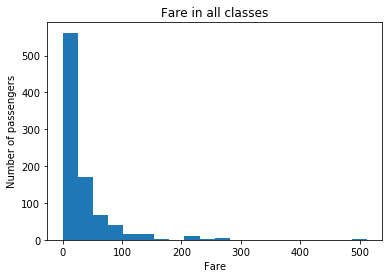

In [15]:
""" plot histogram of fare """
df['Fare'].plot(kind='hist', title='Fare in all classes', bins=20, label='test').set(xlabel="Fare", ylabel="Number of passengers")

Fare shows positively skewed distribution. More deeply, I can see the average fare for each class.

In [16]:
""" describe which Pclass is 1 """
df_1st=df[df['Pclass'] == 1]
df_1st.describe()

,Survived,Pclass,Sex,Age,Fare
count,216.000000,216.0,216.000000,186.000000,216.000000
mean,0.629630,1.0,0.564815,38.233440,84.154694
std,0.484026,0.0,0.496933,14.802855,78.380386
min,0.000000,1.0,0.000000,0.920000,0.000000
25%,0.000000,1.0,0.000000,27.000000,30.923950
50%,1.000000,1.0,1.000000,37.000000,60.287500
75%,1.000000,1.0,1.000000,49.000000,93.500000
max,1.000000,1.0,1.000000,80.000000,512.329224


[<matplotlib.text.Text at 0x97e7990>, <matplotlib.text.Text at 0x9977030>]

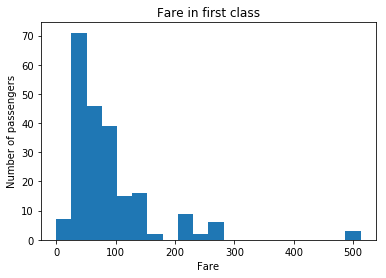

In [17]:
""" plot histogram of fare """
df_1st['Fare'].plot(kind='hist', title='Fare in first class', bins=20, label='test').set(xlabel="Fare", ylabel="Number of passengers")

In [18]:
""" get the value of median """
df_1st['Fare'].median()

60.287498474121094

In [19]:
""" describe which Pclass is 2 """
df_2nd=df[df['Pclass'] == 2]
df_2nd.describe()

,Survived,Pclass,Sex,Age,Fare
count,184.000000,184.0,184.000000,173.00000,184.000000
mean,0.472826,2.0,0.586957,29.87763,20.662182
std,0.500623,0.0,0.493724,14.00108,13.417397
min,0.000000,2.0,0.000000,0.67000,0.000000
25%,0.000000,2.0,0.000000,23.00000,13.000000
50%,0.000000,2.0,1.000000,29.00000,14.250000
75%,1.000000,2.0,1.000000,36.00000,26.000000
max,1.000000,2.0,1.000000,70.00000,73.500000


[<matplotlib.text.Text at 0x9a21e10>, <matplotlib.text.Text at 0x99df450>]

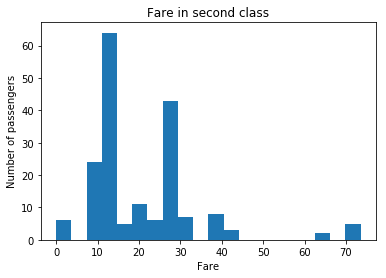

In [20]:
""" plot histogram of fare """
df_2nd['Fare'].plot(kind='hist', title='Fare in second class', bins=20, label='test').set(xlabel="Fare", ylabel="Number of passengers")

In [21]:
""" get the value of median """
df_2nd['Fare'].median()

14.25

In [22]:
""" describe which Pclass is 3 """
df_3rd=df[df['Pclass'] == 3]
df_3rd.describe()

,Survived,Pclass,Sex,Age,Fare
count,491.000000,491.0,491.000000,355.000000,491.000000
mean,0.242363,3.0,0.706721,25.140619,13.675541
std,0.428949,0.0,0.455730,12.495390,11.778147
min,0.000000,3.0,0.000000,0.420000,0.000000
25%,0.000000,3.0,0.000000,18.000000,7.750000
50%,0.000000,3.0,1.000000,24.000000,8.050000
75%,0.000000,3.0,1.000000,32.000000,15.500000
max,1.000000,3.0,1.000000,74.000000,69.550003


[<matplotlib.text.Text at 0x9acaa10>, <matplotlib.text.Text at 0x9a8c190>]

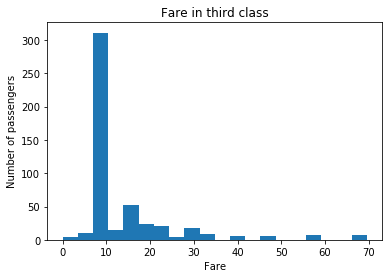

In [23]:
""" plot histogram of fare """
df_3rd['Fare'].plot(kind='hist', title='Fare in third class', bins=20, label='test').set(xlabel="Fare", ylabel="Number of passengers")

In [24]:
""" get the value of median """
df_3rd['Fare'].median()

8.050000190734863

Average fare of first class was £84.15 with a median of £60.29, of second class was £20.66 with of £14.25, of third class was £13.68 with of £8.05.

Back to the point, I will analyze the correlation using many possible kind of filters.

In [25]:
""" get the number of those who was in first class / in second class / in third class """
print (len(df[df['Pclass'] == 1]))
print (len(df[df['Pclass'] == 2]))
print (len(df[df['Pclass'] == 3]))

""" get the number of only those survived in first class / in second class / in third class """
print (len(df[(df['Survived'] == 1) & (df['Pclass'] == 1)]))
print (len(df[(df['Survived'] == 1) & (df['Pclass'] == 2)]))
print (len(df[(df['Survived'] == 1) & (df['Pclass'] == 3)]))

216
184
491
136
87
119


From the data above, I could get the following results:

Percentage of survives in Pclass 1 (first class) = 136/216 = 0.63 = 63%

Percentage of survives in Pclass 2 (second class) = 87/184 = 0.47 = 47%

Percentage of survives in Pclass 3 (third class) = 119/491 = 0.24 = 24%

Hence, pessangers in first class are significantly more likely to survive compared to those in second or third class. Data above can be shown as the following:

[<matplotlib.text.Text at 0x9b52a90>, <matplotlib.text.Text at 0x9b27f50>]

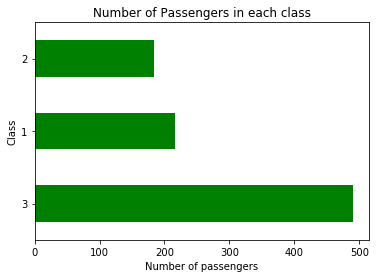

In [26]:
""" plot horizontal bar """

df['Pclass'].value_counts().plot(kind='barh', title='Number of Passengers in each class', color='green').set(xlabel="Number of passengers", ylabel="Class")

[<matplotlib.text.Text at 0x9b3b810>, <matplotlib.text.Text at 0x9b44270>]

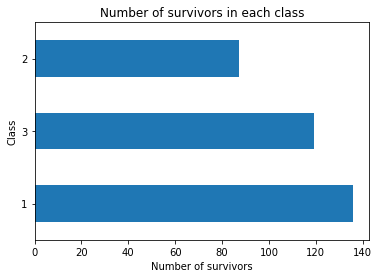

In [27]:
""" plot horizontal bar for those survived only """

df_survived = df[df['Survived'] == 1]
df_survived['Pclass'].value_counts().plot(kind='barh', title='Number of survivors in each class').set(xlabel="Number of survivors", ylabel="Class")

On the next step, gender will be focused instead of the class.

In [28]:
""" get the number of males / females, number of male survivors / female survivors """
print (len(df[df['Sex'] == 1]))
print (len(df[df['Sex'] == 0]))
print (len(df[(df['Survived'] == 1) & (df['Sex'] == 1)]))
print (len(df[(df['Survived'] == 1) & (df['Sex'] == 0)]))

577
314
109
233


From the data above, I could get the following results:

Percentage of male survivors = 109/577 = 0.19 = 19%

Percentage of female survivors = 233/314 = 0.74 = 74%

Hence, female pessangers are significantly more likely to survive than male pessangers. Data above can be shown as the following:

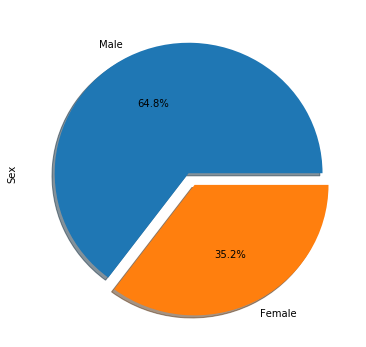

In [29]:
""" plot pie by gender """

explode = [0, 0.1]
autopct = '%1.1f%%'

df['Sex'].value_counts().plot(shadow=True, kind='pie', figsize=(6, 6), autopct=autopct, explode=explode, labels=['Male', 'Female'])

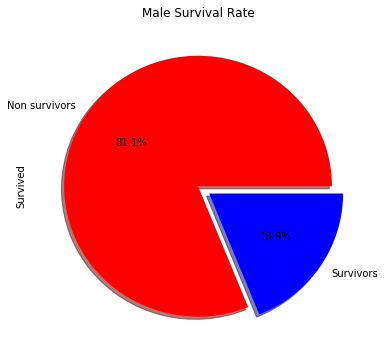

In [30]:
""" male passengers survive rate """

df_male = df[df['Sex'] == 1]
df_male['Survived'].value_counts().plot(shadow=True, title='Male Survival Rate', kind='pie', figsize=(6, 6), colors=['Red', 'Blue'], autopct=autopct, explode=explode, labels=['Non survivors', 'Survivors'])

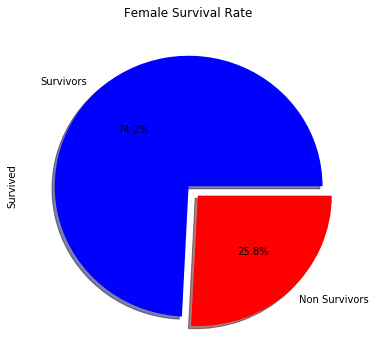

In [31]:
""" female passengers survive rate """

df_female = df[df['Sex'] == 0]
df_female['Survived'].value_counts().plot(shadow=True, title='Female Survival Rate', kind='pie', figsize=(6, 6), colors=['Blue', 'Red'], autopct=autopct, explode=explode, labels=['Survivors', 'Non Survivors'])

These clearly show that female passengers were significantly more likely to survive in Titanic accident. At this point, I could tentatively conclude that "those who were female and in first class were the most likely survived from the accident". In addition to the data above, I will prove it on the next step.

In [32]:
""" get the number of female passengers who was in first class """
print (len(df[(df['Pclass'] == 1) & (df['Sex'] == 0)]))

""" get the number of female survivors who was in first class """
print (len(df[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 0)]))

94
91


Combining the analysis above, I could get the answer that those were female, in first class had the highest chance to survive (91/94 = 0.97 = 97%), which supports my tentative conclusion "those who were female and in first class were the most likely survived from the accident".

Similarly, I could tentatively conclude that "those who were male and in third class were the least likely survived from the accident". On the next step, I will prove it.

In [33]:
""" get the number of male pessangers who was in third class """
print (len(df[(df['Pclass'] == 3) & (df['Sex'] == 1)]))

""" get the number of male survivors who was in third class """
print (len(df[(df['Survived'] == 1) & (df['Pclass'] == 3) & (df['Sex'] == 1)]))

347
47


Combining the analysis above, I could get the answer that those were male, in third class had the least chance to survive (47/347 = 0.135 = 13.5%), which supports my tentative conclusion "those who were male and in third class were the least likely survived from the accident"

## Conclusion

I have used lots of built-in function of Pandas for analyzing and visualizing data in the Titanic sheet given. It was easy and straightforward to find the answers for the questions I had, thanks to those convenient and high level built in functions for calculation and visualization.

There are many limitations to get the more accurate result. First one is the number of rows. There were more than 2200 passengers on Titanic, but in the dataset there are only 891 rows, which is less than half. Also there are many missing data on age column, about 20%. If there is a explanation about what the ticket means, I would be able to analyze it more deeply. One last thing is, if there is a column of nationality, I might be able to make more interesting insight.

It is easy to just load the data and skim through it, but it is difficult to extract useful information from it. Also it is easy to accomplish something with the data, but it is difficult to share it with someone who has no knowledge in the data. Visualization is the key point for these difficulties, and Pandas has been greatly helpful for this project.

## Further Research
While I was trying to find the answer for the questions I had initially, I have found some more interesting facts from the data, such as:

In [34]:
""" read the new csv file, which is unfiltered, then get the rows only where the fare is more than 500 """
df = pd.read_csv('../Nanodegree/titanic-data.csv')
df_fare = df[df['Fare'] > 500]
df_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


who made these people pay a lot more than other people? Why did they pay same amount? How did they have same ticket number? Is it coincidence that all of them survived?

I can make some guess why, like some mistakes made by human error, but cannot analyze it and find it why without enough data from other sources.